In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [61]:
data = {
    "size" : [30, 39, 49, 60],
    "price" : [57000, 69000, 77000, 90000],
}

df_data = pd.DataFrame(data)
df_data

,size,price
0,30,57000
1,39,69000
2,49,77000
3,60,90000


# Correlation

- Covariation
    
 - $cov = \frac{∑(xi - \overline{x}) * (yi - \overline{x})}{(n - 1)}$

- Correlation
 - $corr = \frac{Cov(x, y)}{std(x) * std(y)}$

- Determination coefficient (R2)
 - $dc = corr^2$

## Manual approach

In [8]:
df_data['diff'] = (df_data['size'] - df_data['size'].mean()) * (df_data['price'] - df_data['price'].mean())
df_data

,size,price,diff
0,30,57000,235625.0
1,39,69000,23375.0
2,49,77000,16875.0
3,60,90000,259625.0


In [9]:
cov = df_data['diff'].sum() / (len(df_data) - 1)
cov

178500.0

In [12]:
corr = cov / (df_data['size'].std() * df_data['price'].std())
corr

0.9962006267707775

In [13]:
dc = math.pow(corr, 2)
dc

0.9924156887784898

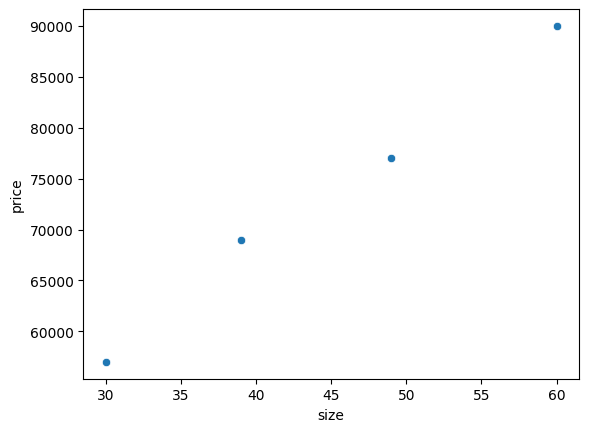

In [16]:
sns.scatterplot(x=df_data['size'], y=df_data['price']);

## Using Pandas and Numpy libraries

In [17]:
np.cov(df_data['size'], df_data['price'])

array([[1.6700e+02, 1.7850e+05],
       [1.7850e+05, 1.9225e+08]])

In [18]:
df_data.cov()

,size,price,diff
size,167.0,178500.0,1.850000e+05
price,178500.0,192250000.0,1.612500e+08
diff,185000.0,161250000.0,1.735512e+10


In [19]:
np.corrcoef(df_data['size'], df_data['price'])

array([[1.        , 0.99620063],
       [0.99620063, 1.        ]])

In [20]:
df_data.corr()

,size,price,diff
size,1.000000,0.996201,0.108667
price,0.996201,1.000000,0.088278
diff,0.108667,0.088278,1.000000


<AxesSubplot: >

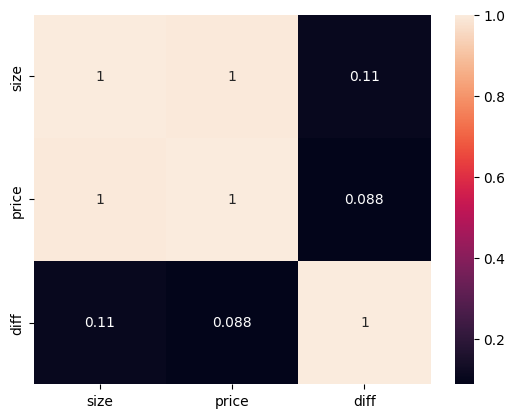

In [25]:
sns.heatmap(df_data.corr(), annot=True)

## Using df houses to get correlation between the variables

In [63]:
df_houses = pd.read_csv('Bases de dados/house_prices.csv')
df_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [64]:
df_houses.select_dtypes(include=np.number).corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


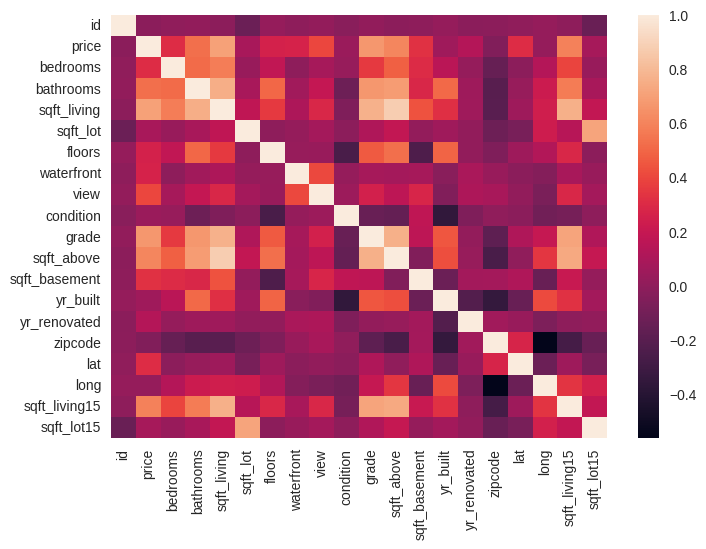

In [65]:
sns.heatmap(df_houses.select_dtypes(include=np.number).corr(), annot=False);

<AxesSubplot: >

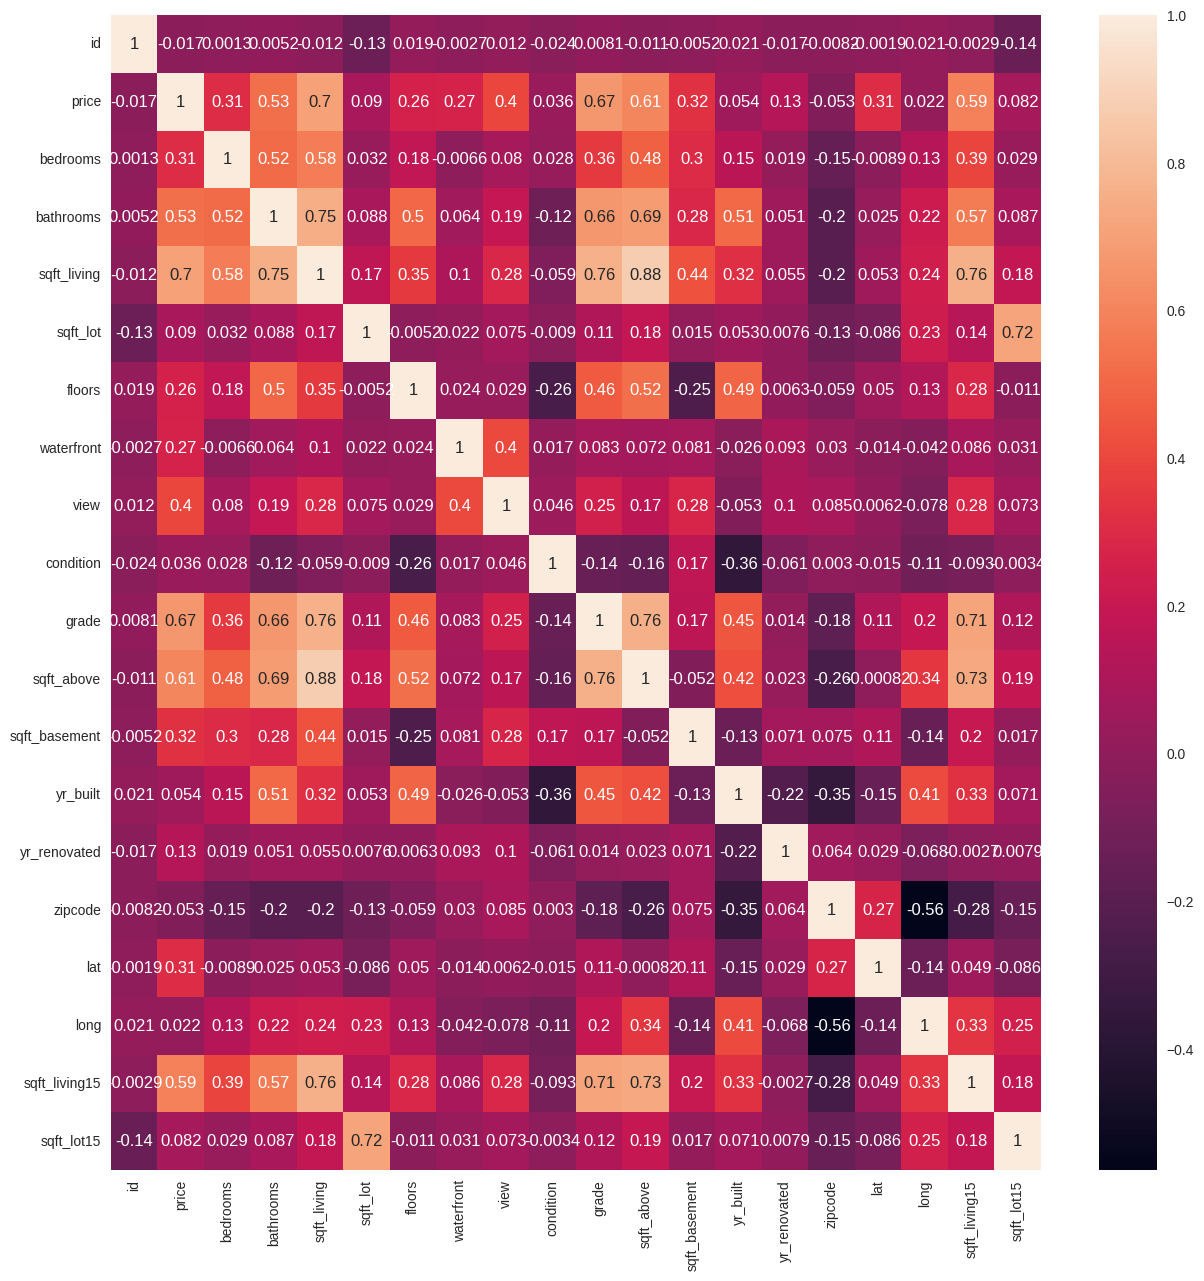

In [66]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_houses.select_dtypes(include=np.number).corr(), annot=True, ax=ax)

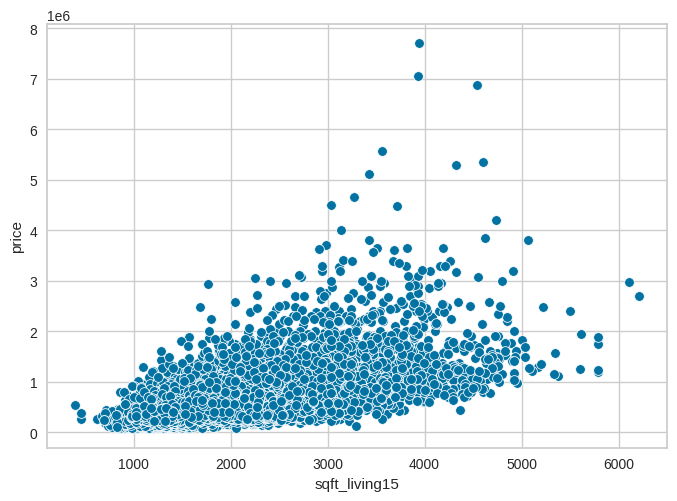

In [67]:
sns.scatterplot(x=df_houses['sqft_living15'], y=df_houses['price']);

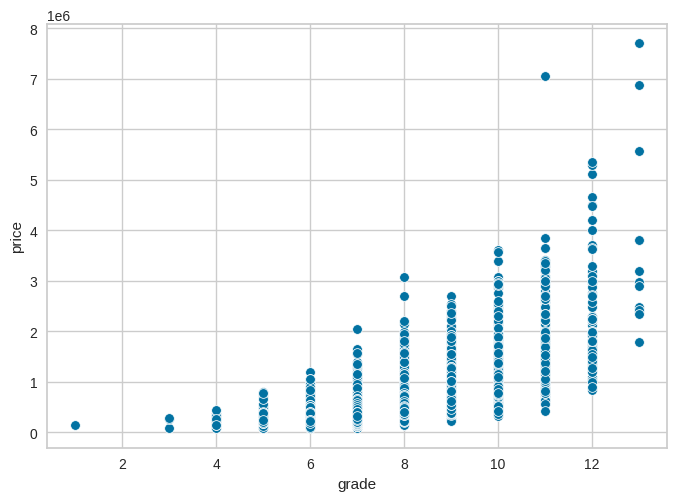

In [68]:
sns.scatterplot(x=df_houses['grade'], y=df_houses['price']);

## Correlation with YellowBrick library

- https://www.scikit-yb.org/en/latest/

In [48]:
!pip install yellowbrick --upgrade

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 9.3 MB/s eta 0:00:00


In [49]:
from yellowbrick.target import FeatureCorrelation

In [69]:
df_houses.drop(['id', 'date'], axis=1, inplace=True)

In [60]:
df_houses.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

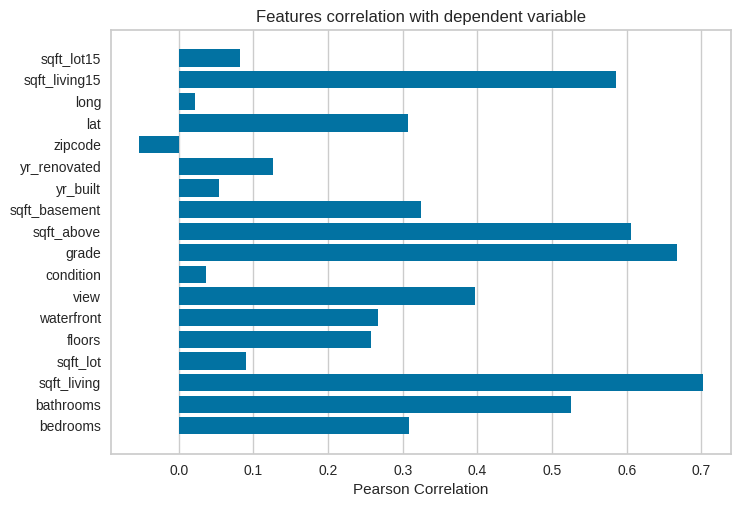

<AxesSubplot: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [70]:
feaure_correlation = FeatureCorrelation(labels=df_houses.select_dtypes(include=np.number).columns[1:])
feaure_correlation.fit(X=df_houses.select_dtypes(include=np.number).iloc[:, 1:].values, y=df_houses.select_dtypes(include=np.number).iloc[:, 0].values)
feaure_correlation.show()

# Regression

## Simple linear regression

$ y = b_{0} + b_{1} * x_{1} $

In [71]:
df_houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot: >

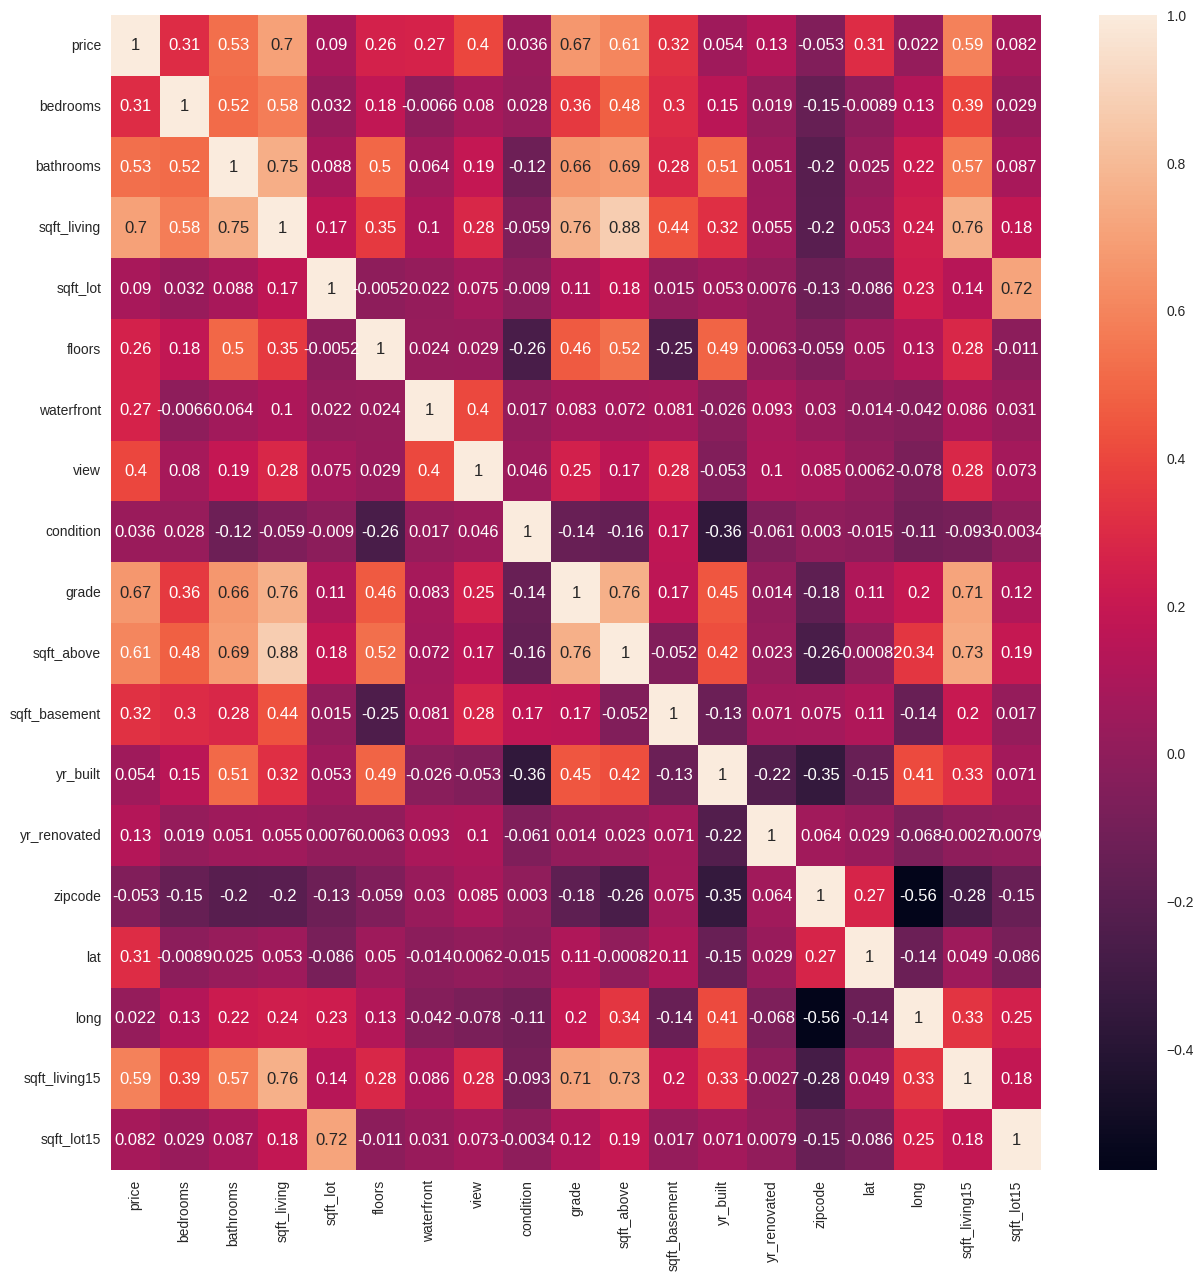

In [72]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_houses.corr(), annot=True, ax=ax)

In [73]:
df_houses['sqft_living15']

0        1340
1        1690
2        2720
3        1360
4        1800
         ... 
21608    1530
21609    1830
21610    1020
21611    1410
21612    1020
Name: sqft_living15, Length: 21613, dtype: int64

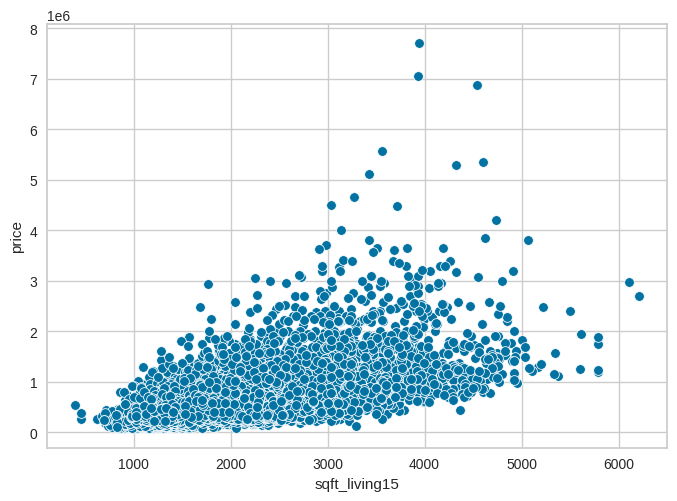

In [75]:
sns.scatterplot(x=df_houses['sqft_living15'], y=df_houses['price']);

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [77]:
X = df_houses['sqft_living'].values
y = df_houses['price'].values

X.shape, y.shape

((21613,), (21613,))

In [78]:
X = X.reshape(-1, 1)
X.shape

(21613, 1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((17290, 1), (4323, 1))

In [80]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [81]:
#b0
linear.intercept_

-30186.36106105463

In [82]:
#b1
linear.coef_

array([273.82181112])

predicting

In [84]:
linear.intercept_ + linear.coef_ * 900 #using formula to predict 900 of sqft_living

array([216253.26894848])

In [85]:
linear.predict(np.array([[900]]))

array([216253.26894848])

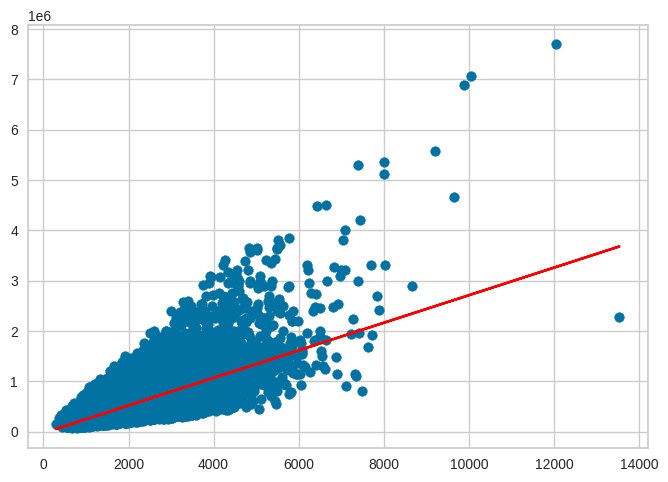

In [90]:
plt.scatter(X, y)
plt.plot(X, linear.predict(X), color='red');

In [91]:
linear.score(X_train, y_train)

0.48876078213887486

In [92]:
linear.score(X_test, y_test)

0.5033019006466926

### Evaluation metrics
- Mean Absolute Error (MAE)
 - $ \frac{1}{n}\sum |y_{i} - ŷ_{i}| $
- Mean Squared Error (MSE)
 - $ \frac{1}{n}\sum (y_{i} - ŷ_{i})^2 $
- Root Mean Squared Error (RMSE)
 - \sqrt{MSE}

In [94]:
pred = linear.predict(X_test)

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [96]:
mean_absolute_error(y_true=y_test, y_pred=pred)

178578.01159005202

In [97]:
mean_squared_error(y_true=y_test, y_pred=pred)

85730574276.16483

In [99]:
math.sqrt(mean_squared_error(y_true=y_test, y_pred=pred)) # Root mean squared error

292797.83857836935

## Multiple Linear Regression

<AxesSubplot: >

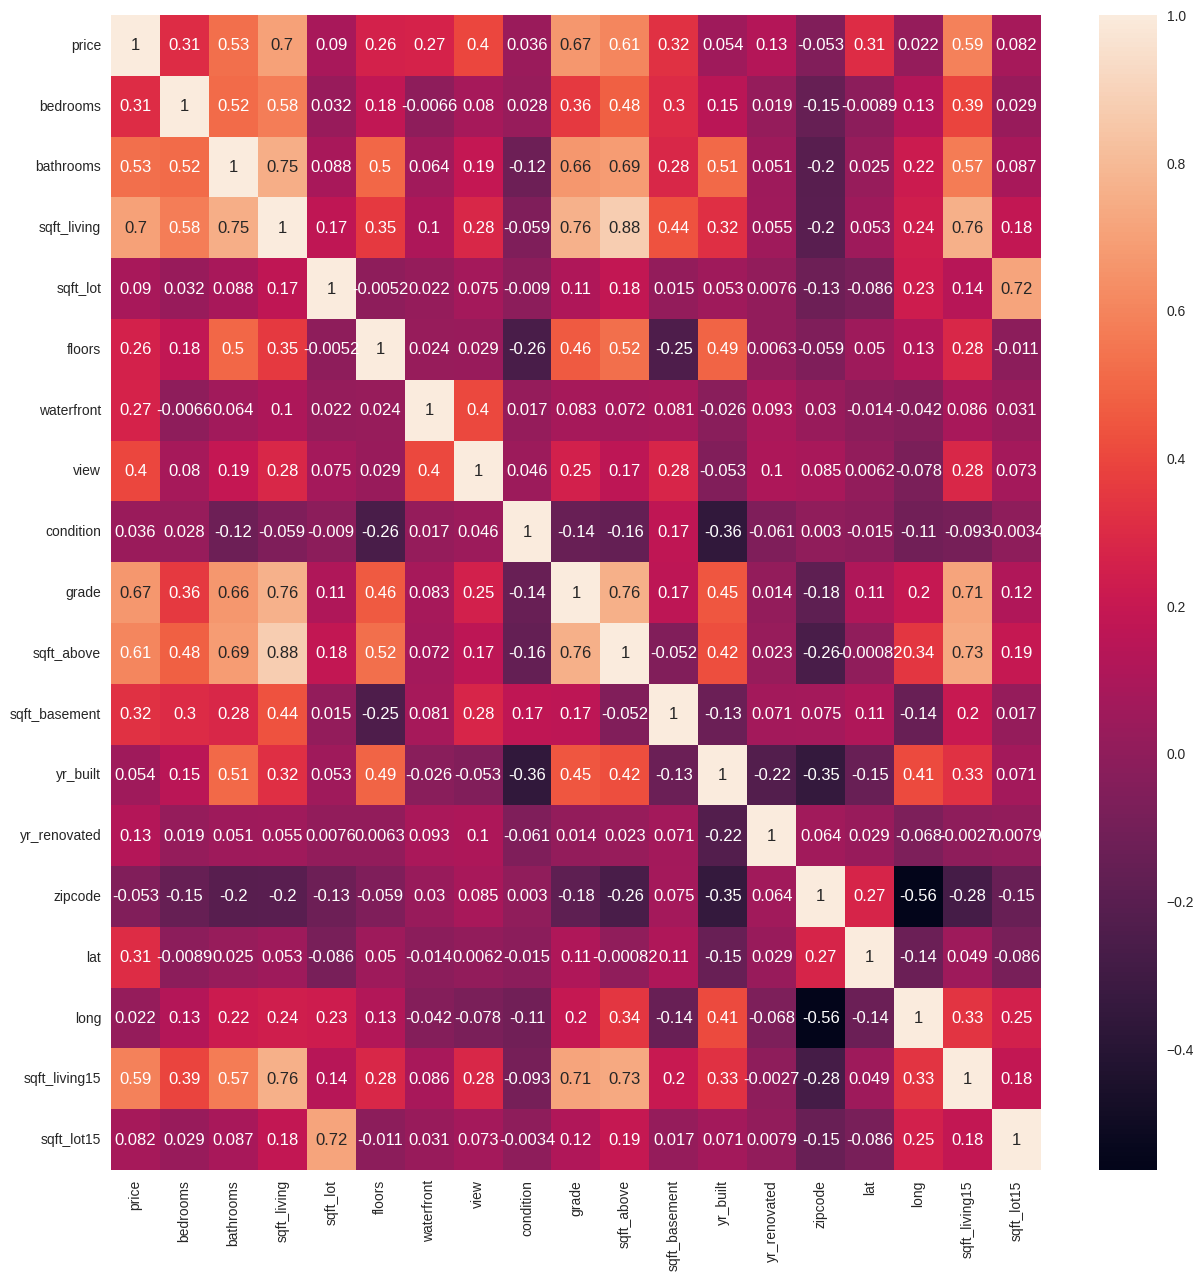

In [100]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_houses.corr(), annot=True, ax=ax)

In [101]:
df_houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [102]:
features = ['bathrooms', 'sqft_living', 'grade', 'sqft_above']
target = ['price']

X = df_houses[features].values
y = df_houses[target].values

X.shape, y.shape

((21613, 4), (21613, 1))

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((17290, 4), (4323, 4))

In [104]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

### Evaluating

In [106]:
linear.score(X_train, y_train)

0.5429158715490658

In [105]:
linear.score(X_test, y_test)

0.5433655885394328

In [107]:
pred = linear.predict(X_test)

In [108]:
mean_absolute_error(y_test, pred)

163331.28566448088

In [109]:
mean_squared_error(y_test, pred)

78815542841.30017

In [110]:
math.sqrt(mean_squared_error(y_test, pred))

280741.06012712175

### Normalizing y variable to a normal distribution

<AxesSubplot: ylabel='Count'>

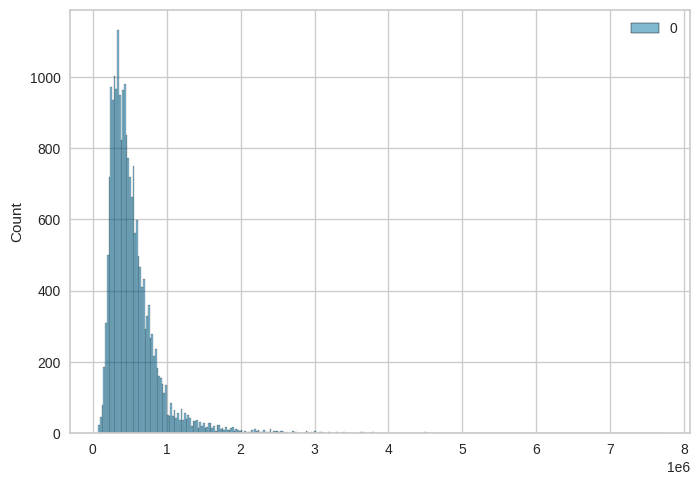

In [111]:
sns.histplot(y)

<AxesSubplot: ylabel='Count'>

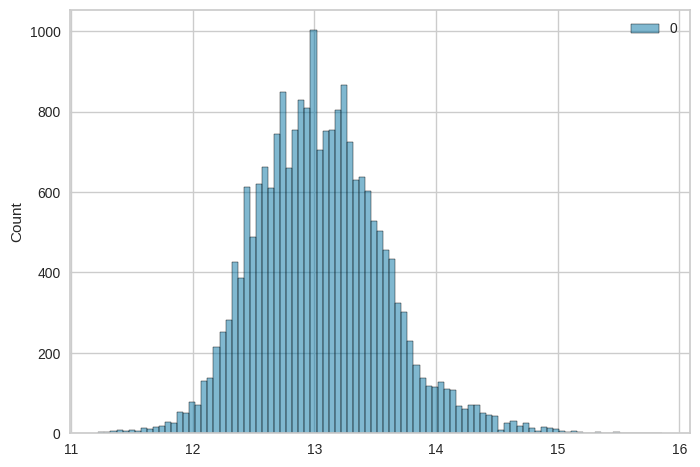

In [112]:
y = np.log(y)

sns.histplot(y)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [114]:
linear.score(X_train, y_train), linear.score(X_test, y_test)

(0.559462085496587, 0.5837363233351283)